# Data pre-processing

## Instructions

### Contents

- Data pre-processing techniques.
    - Exploring your data 
    - Encoding categorical 
    - Discretization techniques 
    - Outlier handling techniques 
    - Feature scaling techniques 
    - Clean submission 

## Import libs

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'c:\\Users\\pc\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
raw_df = pd.read_csv('./data/spaceX_launch.csv')
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [7]:
shape = raw_df.shape
shape

(205, 17)

### What does each line mean? Does it matter if the lines have different meanings?

- Each row represents a SpaceX rocket launch, containing information such as the date and time, the rocket's name, the launch site, the result, etc.
- Each row has different meanings and is important because each row represents a specific launch with distinct characteristics and outcomes.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [8]:
num_duplicated_rows = raw_df.duplicated().sum()
num_duplicated_rows

0

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [9]:
metadata = pd.read_json('./data/metadata.json')
metadata

,title,description,source,certificate_link,certificate,attributions
uct_time,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch date in UTC format.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
payloads,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The list information about the payloads on the launch.
rocket_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the rocket.
rocket_boosters,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The number of boosters on the rocket.
rocket_height,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The height information about the rocket (m).
rocket_diameter,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The diameter information about the rocket (m).
rocket_mass,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The mass information about the rocket (kg).
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.


- `uct_time`: Datetime
- `launch_name`: String (Object)
- `payloads`: String (Object)
- `rocket_name`: String (Object)
- `rocket_boosters`: Integer
- `rocket_height`: Float
- `rocket_diameter`: Float
- `rocket_mass`: Integer
- `launchpad_name`: String (Object)
- `launchpad_region`: String (Object)
- `launchpad_geo`: String (Object) (Latitude, Longitude)  (We should split this into two separate columns, each of type float, containing the Latitude and Longitude values.)
- `landpad`: String (Object)
- `landpad_name`: String (Object)
- `landpad_type`: String (Object)
- `landpad_region`: String (Object)
- `landpad_geo`: String (Object) (Latitude, Longitude)  (We should split this into two separate columns, each of type float, containing the Latitude and Longitude values.)
- `outcome`: String (Object)

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [10]:
dtypes = raw_df.dtypes
int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
object_cols = set(dtypes[dtypes == object].index)
int_cols, float_cols, object_cols

({'rocket_boosters'},
 {'landpad', 'rocket_diameter', 'rocket_height', 'rocket_mass'},
 {'landpad_geo',
  'landpad_name',
  'landpad_region',
  'landpad_type',
  'launch_name',
  'launchpad_geo',
  'launchpad_name',
  'launchpad_region',
  'outcome',
  'payloads',
  'rocket_name',
  'uct_time'})

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [11]:
raw_df['uct_time'] = pd.to_datetime(raw_df['uct_time'])
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [12]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


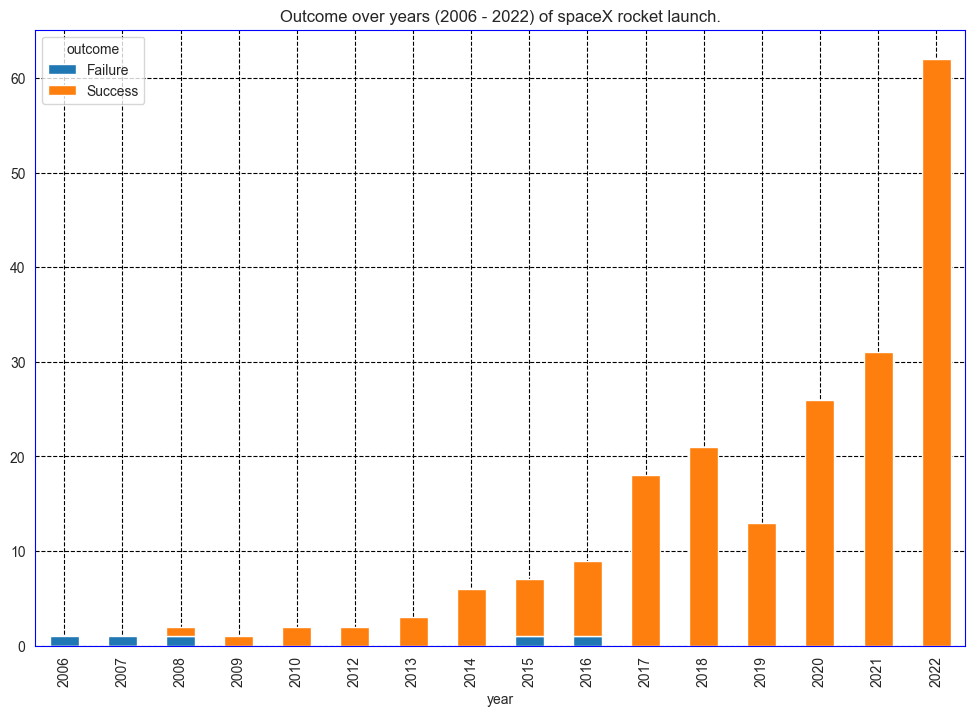

In [13]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

- Overall, the number of rocket launches has generally increased over the years (except for 2019, when the number of launches decreased, possibly due to the COVID-19 pandemic).
- In general, the proportion of failed rocket launches is very low.
- From 2006 to 2008, the failure rate of rocket launches was relatively high. In the following years, the failure rate decreased significantly and became negligible compared to the earlier years.
- Between 2006 and 2022, there were only about five failed rocket launches.
Notably, in 2022, the number of rocket launches was the highest and nearly doubled compared to the previous year.

### Exploring numerical attributes

In [14]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [15]:
def missing_ratio(s):
    return (s.isnull().mean()*100).round(1)

def median(df):
    return df.quantile(0.5).round(1)

def lower_quartile(df):
    return df.quantile(0.25).round(1)

def upper_quartile(df):
    return df.quantile(0.75).round(1)

In [16]:
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [17]:
tmp = num_col_info_df.loc['missing_ratio'] > 70
col_to_drop = tmp[tmp == 1].index.tolist()
num_col_df.drop(columns=col_to_drop, inplace=True)
raw_df.drop(columns=col_to_drop, inplace=True)
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [18]:
## Mean fill
num_col_df['mean_fill_rocket_height'] = num_col_df['rocket_height'].fillna(np.round(num_col_df['rocket_height'].mean(),2))
num_col_df['mean_fill_rocket_diameter'] = num_col_df['rocket_diameter'].fillna(np.round(num_col_df['rocket_diameter'].mean(),2))
num_col_df['mean_fill_rocket_mass'] = num_col_df['rocket_mass'].fillna(np.round(num_col_df['rocket_mass'].mean(),2))

In [19]:
## Median fill
num_col_df['median_fill_rocket_height'] = num_col_df['rocket_height'].fillna(np.round(num_col_df['rocket_height'].median(),2))
num_col_df['median_fill_rocket_diameter'] = num_col_df['rocket_diameter'].fillna(np.round(num_col_df['rocket_diameter'].median(),2))
num_col_df['median_fill_rocket_mass'] = num_col_df['rocket_mass'].fillna(np.round(num_col_df['rocket_mass'].median(),2))

In [20]:
## Mode fill
num_col_df['mode_fill_rocket_height'] = num_col_df['rocket_height'].fillna(np.round(num_col_df['rocket_height'].mode().values[0],2))
num_col_df['mode_fill_rocket_diameter'] = num_col_df['rocket_diameter'].fillna(np.round(num_col_df['rocket_diameter'].mode().values[0],2))
num_col_df['mode_fill_rocket_mass'] = num_col_df['rocket_mass'].fillna(np.round(num_col_df['rocket_mass'].mode().values[0],2))

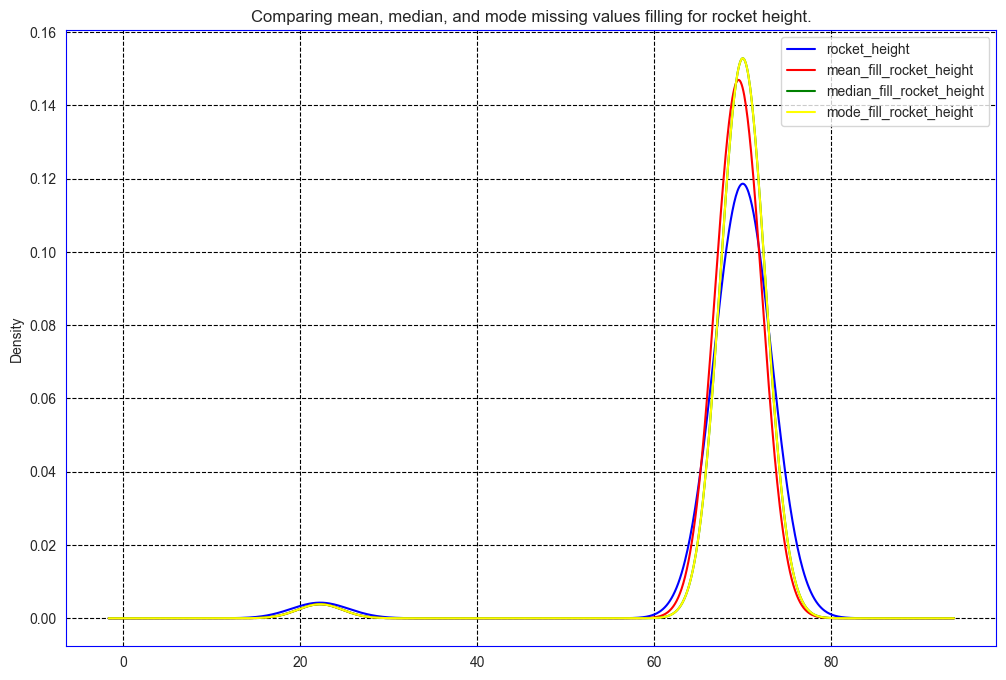

In [21]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

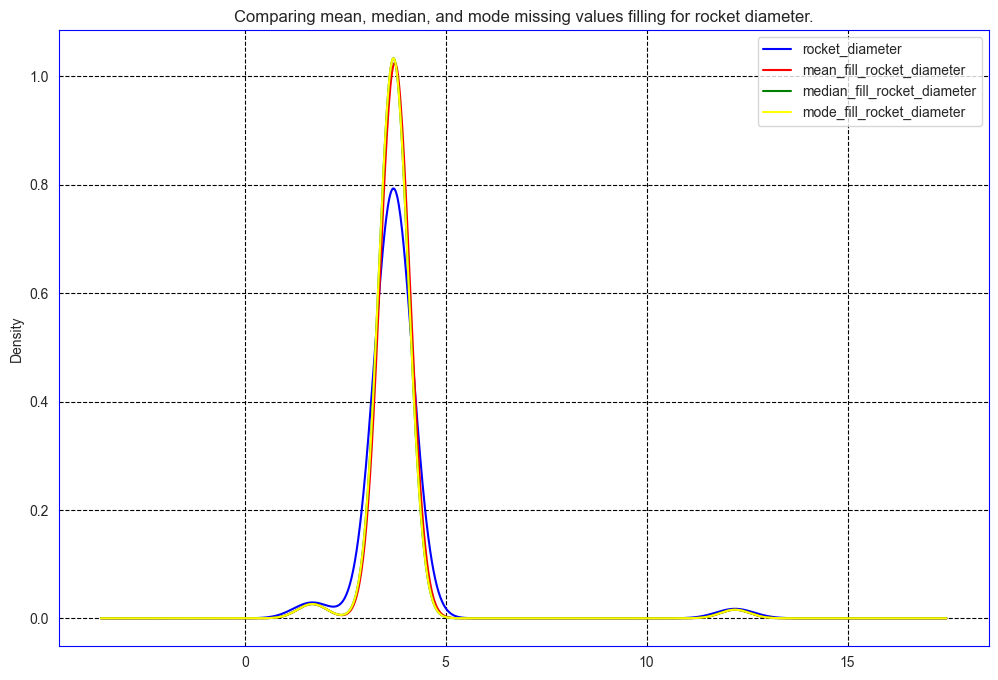

In [22]:
# Visualization for rocket_diameter
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_diameter"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_diameter"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_diameter"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_diameter"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket diameter.")
plt.show()

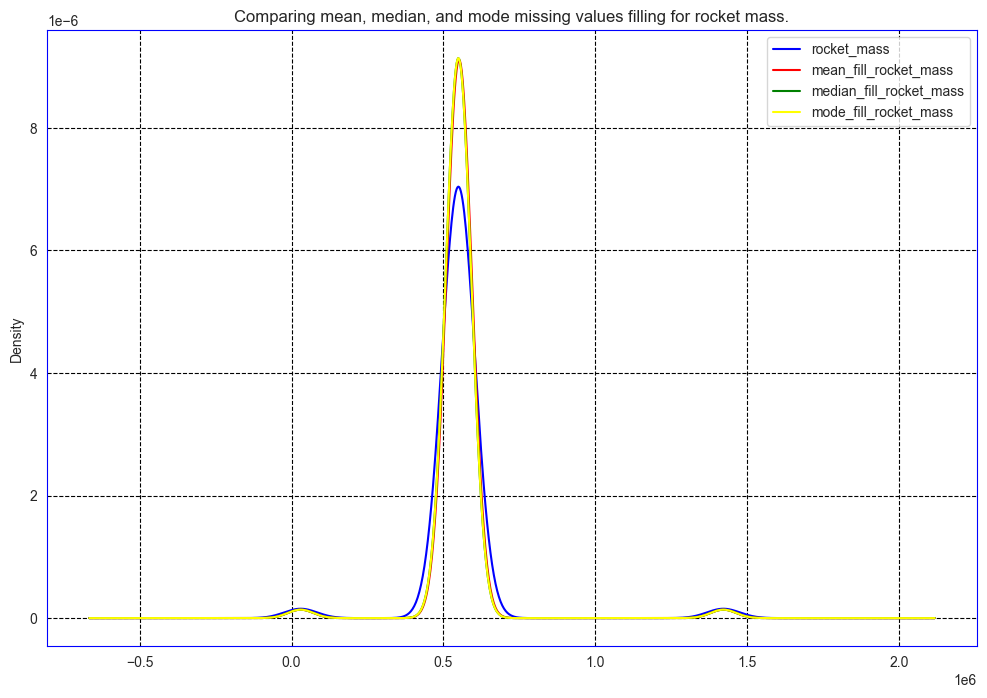

In [23]:
# Visualization for rocket_mass
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_mass"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_mass"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_mass"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_mass"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket mass.")
plt.show()

- For the two features `rocket_mass` and `rocket_diameter`, the probability distribution curves when filled using the mean, median, and mode are almost identical.
- For the feature `rocket_height`, the probability distribution curves when filled using the median and mode are nearly identical, but they differ from the distribution curve when filled using the mean.

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [24]:
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

array(['Falcon 1', 'Falcon 9', 'Falcon Heavy'], dtype=object)

In [25]:
## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    return tuple(raw_df[raw_df['rocket_name'] == rocket_name]['rocket_height'].agg(['min', 'max']))

In [26]:
checking_range(rocket_name="Falcon 1"), checking_range(rocket_name="Falcon 9"), checking_range(rocket_name="Falcon Heavy")

((22.25, 22.25), (70.0, 70.0), (70.0, 70.0))

And now, you should fill missing values with a specific value. 

In [27]:
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    
    for name in cp_df['rocket_name'].unique():
        cp_df.loc[(cp_df['rocket_name'] == name) & cp_df['rocket_height'].isna(), 'rocket_height'] = checking_range(name)[0]
    return cp_df

raw_df = fill_rocketheight(raw_df)
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24 22:30:00+00:00,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21 01:10:00+00:00,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03 03:34:00+00:00,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28 23:15:00+00:00,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13 03:35:00+00:00,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [28]:
raw_df['rocket_diameter'].fillna(np.round(num_col_df['rocket_diameter'].mean(),2), inplace=True)
raw_df['rocket_mass'].fillna(np.round(num_col_df['rocket_mass'].mean(),2), inplace=True)

In [29]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [30]:
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


- `rocket_boosters`, `rocket_mass`: Discrete variables (because in this dataset, `rocket_boosters` and `rocket_mass` are integers).
- `rocket_height`, `rocket_diameter`: Continuous variables.

### Exploring non-numerical attributes

In [31]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [32]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    return eval(s)

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [33]:
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')
cate_col_df['payloads'] = cate_col_df['payloads'].astype(str)

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [34]:
def missing_ratio(s):
    return (s.isnull().mean()*100).round(1)

def num_values(s):
    return len(s.value_counts())

def value_ratios(s):
    value_count = s.value_counts()
    return (((value_count/value_count.sum())*100).round(1)).to_dict()

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,147,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 11.5, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [35]:
cat_col_info_df['landpad_name']

missing_ratio                                                                                      27.3
num_values                                                                                            6
value_ratios     {'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}
Name: landpad_name, dtype: object

In [36]:
cat_col_info_df['landpad_type']

missing_ratio                                          23.9
num_values                                                3
value_ratios     {'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}
Name: landpad_type, dtype: object

In [37]:
cat_col_info_df['landpad_region']

missing_ratio                                     47.4
num_values                                           2
value_ratios     {'Florida': 53.6, 'California': 46.4}
Name: landpad_region, dtype: object

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [38]:
cate_col_df.drop(index=cate_col_df[(cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()) |
                                   (cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull()) |
                                   (cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_region"].isnull()) |
                                   (cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()) ].index, inplace=True)
cate_col_df.reset_index(drop=True, inplace=True)

In [39]:
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [40]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

- It can be observed that for the Falcon 9 rocket, there are six different `landpad_name` values, each corresponding to one of two `landpad_region` values: 'Florida' or 'California'. Therefore, to fill in the missing `landpad_region` values, we only need to consider the `landpad_name` associated with that data.

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

- The Falcon 9 rocket with `landpad_geo = (33.7291858, -118.262015)` has `landpad_name = OCISLY` → `landpad_region = California`.
- The Falcon 9 rocket with `landpad_geo = (28.4104, -80.6188)` has `landpad_name = JRTI` → `landpad_region = Florida`.
- The Falcon 9 rocket with `landpad_geo = (33.7291858, -118.262015)` has `landpad_name = ASOG` → `landpad_region = Florida`.
- The Falcon 9 rocket with `landpad_geo = (28.485833, -80.544444)` has `landpad_name = LZ-1` → `landpad_region = Florida`.
- The Falcon 9 rocket with `landpad_geo = (34.632989, -120.615167)` has `landpad_name = LZ-4` → `landpad_region = California`.
- The Falcon 9 rocket with `landpad_geo = (28.4104, -80.6188)` has `landpad_name = JRTI-1` → `landpad_region = Florida`.

In [41]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    if (df is None):
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    df_cp.loc[(df_cp['landpad_name'] == 'OCISLY') | (df_cp['landpad_name'] == 'LZ-4'), 'landpad_region'] = 'California'
    df_cp.loc[(df_cp['landpad_name'] == 'JRTI') | (df_cp['landpad_name'] == 'ASOG') | (df_cp['landpad_name'] == 'LZ-1'), 'landpad_region'] = 'Florida'
    return df_cp

cate_col_df = fill_landpadregion(cate_col_df)

In [42]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Fill missing values for all `raw_df`

In [43]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

raw_df = raw_df.explode('payloads')
raw_df['payloads'] = raw_df['payloads'].astype(str)
raw_df.drop(index=raw_df[raw_df["landpad_name"].isnull() & raw_df["landpad_type"].isnull() & raw_df["landpad_region"].isnull()].index, inplace=True)
raw_df.reset_index(drop=True, inplace=True)
raw_df.drop(index=raw_df[raw_df['landpad_type'] == 'Ocean'].index, inplace=True)
raw_df.reset_index(drop=True, inplace=True)
raw_df = fill_landpadregion(raw_df)

In [44]:
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [45]:
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)

In [46]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [47]:
cate_col_df2.drop(index=cate_col_df2[(cate_col_df2['type'].isna() & cate_col_df2['mass'].isna() & cate_col_df2['orbit'].isna()) |
                                                                    (cate_col_df2['type'].isna() & cate_col_df2['mass'].isna()) |
                                                                    (cate_col_df2['type'].isna() & cate_col_df2['orbit'].isna())|
                                                                    (cate_col_df2['orbit'].isna() & cate_col_df2['mass'].isna())].index, inplace=True)

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [48]:
drop_idx = cate_col_df2[cate_col_df2['mass'].isna()].index

In [49]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [50]:
cate_col_df2.drop(drop_idx, inplace=True)

In [51]:
cate_col_df2["mass"] = cate_col_df2["mass"].astype(int).astype(str)

In [52]:
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])
cat_col_info_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,141,2,3,2,3,6,2,2,4,2,4,96,11
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.4, 'CRS-5': 0.7, 'DART': 0.7, 'GPS III SV05...","{'Falcon 9': 97.9, 'Falcon Heavy': 2.1}","{'CCSFS SLC 40': 52.1, 'KSC LC 39A': 32.4, 'VAFB SLC 4E': 15.5}","{'Florida': 84.5, 'California': 15.5}","{'(28.5618571, -80.577366)': 52.1, '(28.6080585, -80.6039558)': 32.4, '(34.632093, -120.610829)'...","{'OCISLY': 44.4, 'JRTI': 28.2, 'ASOG': 14.1, 'LZ-1': 8.5, 'LZ-4': 3.5, 'JRTI-1': 1.4}","{'ASDS': 88.0, 'RTLS': 12.0}","{'Florida': 52.1, 'California': 47.9}","{'(33.7291858, -118.262015)': 58.5, '(28.4104, -80.6188)': 29.6, '(28.485833, -80.544444)': 8.5,...","{'Success': 98.6, 'Failure': 1.4}","{'Satellite': 82.4, 'Dragon 1.1': 9.9, 'Crew Dragon': 4.2, 'Dragon 2.0': 3.5}","{'15600': 17.6, '13260': 8.5, '9600': 3.5, '14760': 1.4, '5500': 1.4, '7000': 1.4, '3500': 1.4, ...","{'VLEO': 41.5, 'ISS': 16.9, 'GTO': 15.5, 'PO': 7.0, 'SSO': 6.3, 'LEO': 5.6, 'MEO': 2.8, 'GEO': 1..."


- Step 03: Apply for `raw_df`

In [53]:
# Step 01: unpack `payloads`
raw_df['payloads'] = raw_df['payloads'].apply(str2dict)
raw_df = raw_df.join(pd.DataFrame(raw_df['payloads'].tolist())).drop('payloads', axis=1)  

In [54]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
raw_df.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'}, inplace=True)
raw_df

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.54,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.00,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2022-09-05 02:09:00+00:00,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,2022-09-11 01:10:00+00:00,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,0,70.0,3.7,556404.54,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,2022-09-17 01:05:00+00:00,Starlink 4-34 (v1.5),Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,2022-09-24 23:30:00+00:00,Starlink 4-35 (v1.5),Falcon 9,0,70.0,3.7,556404.54,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


In [55]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
raw_df.drop(index=raw_df[(raw_df['payloads_type'].isna() & raw_df['payloads_mass'].isna() & raw_df['payloads_orbit'].isna()) |
                                                            (raw_df['payloads_type'].isna() & raw_df['payloads_mass'].isna()) |
                                                            (raw_df['payloads_type'].isna() & raw_df['payloads_orbit'].isna())|
                                                            (raw_df['payloads_orbit'].isna() & raw_df['payloads_mass'].isna())].index, inplace=True)

In [56]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
drop_idx = raw_df[raw_df['payloads_mass'].isna()].index
raw_df.drop(drop_idx, inplace=True)
raw_df["payloads_mass"] = raw_df["payloads_mass"].astype(int).astype(str)

In [57]:
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,141,2,3,2,3,6,2,2,4,2,4,96,11
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.4, 'CRS-5': 0.7, 'DART': 0.7, 'GPS III SV05...","{'Falcon 9': 97.9, 'Falcon Heavy': 2.1}","{'CCSFS SLC 40': 52.1, 'KSC LC 39A': 32.4, 'VAFB SLC 4E': 15.5}","{'Florida': 84.5, 'California': 15.5}","{'(28.5618571, -80.577366)': 52.1, '(28.6080585, -80.6039558)': 32.4, '(34.632093, -120.610829)'...","{'OCISLY': 44.4, 'JRTI': 28.2, 'ASOG': 14.1, 'LZ-1': 8.5, 'LZ-4': 3.5, 'JRTI-1': 1.4}","{'ASDS': 88.0, 'RTLS': 12.0}","{'Florida': 52.1, 'California': 47.9}","{'(33.7291858, -118.262015)': 58.5, '(28.4104, -80.6188)': 29.6, '(28.485833, -80.544444)': 8.5,...","{'Success': 98.6, 'Failure': 1.4}","{'Satellite': 82.4, 'Dragon 1.1': 9.9, 'Crew Dragon': 4.2, 'Dragon 2.0': 3.5}","{'15600': 17.6, '13260': 8.5, '9600': 3.5, '14760': 1.4, '5500': 1.4, '7000': 1.4, '3500': 1.4, ...","{'VLEO': 41.5, 'ISS': 16.9, 'GTO': 15.5, 'PO': 7.0, 'SSO': 6.3, 'LEO': 5.6, 'MEO': 2.8, 'GEO': 1..."


In [58]:
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.54,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.00,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [59]:
def str2tuple(s: str) -> tuple:
    return eval(s)

In [60]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [61]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [62]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395,ISS,28.561857,-80.577366,28.410400,-80.618800
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898,ISS,28.561857,-80.577366,28.410400,-80.618800
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.54,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952,ISS,28.561857,-80.577366,33.729186,-118.262015
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.00,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034,LEO,28.561857,-80.577366,28.485833,-80.544444
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.00,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `one hot encoding`, and for `nominal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

> Since `launch_name` is the name of a rocket launch, this feature is categorized as nominal.

In [63]:
raw_df = pd.get_dummies(raw_df, columns=['launch_name'],prefix='launch_name',prefix_sep='_')

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

> Since `rocket_name` is the name of the rocket being launched, this feature is categorized as nominal.

In [64]:
raw_df = pd.get_dummies(raw_df, columns=['rocket_name'],prefix='rocket_name',prefix_sep='_')

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

> Since `launchpad_name` is the name of the rocket launch site, this feature is categorized as nominal.

In [65]:
raw_df = pd.get_dummies(raw_df, columns=['launchpad_name'],prefix='launchpad_name',prefix_sep='_')

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

> Since `launchpad_region` is the name of the region where the rocket is launched, this feature is categorized as nominal.

In [66]:
raw_df = pd.get_dummies(raw_df, columns=['launchpad_region'],prefix='launchpad_region',prefix_sep='_')

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

> Since `landpad_name` is the name of the landing site for the rocket, this feature is categorized as nominal.

In [67]:
raw_df = pd.get_dummies(raw_df, columns=['landpad_name'],prefix='landpad_name',prefix_sep='_')

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

> Since `landpad_type` refers to the type of landing site for the rocket, this feature is categorized as nominal.

In [68]:
raw_df = pd.get_dummies(raw_df, columns=['landpad_type'],prefix='landpad_type',prefix_sep='_')

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

> Since landpad_region is the name of the region where the rocket lands, this feature is categorized as nominal.

In [69]:
raw_df = pd.get_dummies(raw_df, columns=['landpad_region'],prefix='landpad_region',prefix_sep='_')

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

> Since `outcome` represents the success or failure of the rocket launch, this feature is categorized as nominal.

In [70]:
raw_df = pd.get_dummies(raw_df, columns=['outcome'],prefix='outcome',prefix_sep='_')

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

> Since `payloads_type` represents information about the type of payload for the launch, this variable is categorized as nominal.

In [71]:
raw_df = pd.get_dummies(raw_df, columns=['payloads_type'],prefix='payloads_type',prefix_sep='_')

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

> Since `payloads_orbit` represents information about the orbit of the launch, this variable is categorized as nominal.

In [72]:
raw_df = pd.get_dummies(raw_df, columns=['payloads_orbit'],prefix='payloads_orbit',prefix_sep='_')

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [73]:
raw_df.dtypes

uct_time               datetime64[ns, UTC]
rocket_boosters                      int64
rocket_height                      float64
rocket_diameter                    float64
rocket_mass                        float64
                              ...         
payloads_orbit_MEO                    bool
payloads_orbit_PO                     bool
payloads_orbit_SSO                    bool
payloads_orbit_TLI                    bool
payloads_orbit_VLEO                   bool
Length: 185, dtype: object

In [74]:
raw_df['payloads_mass'] = raw_df['payloads_mass'].astype('float64')

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [75]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_na

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

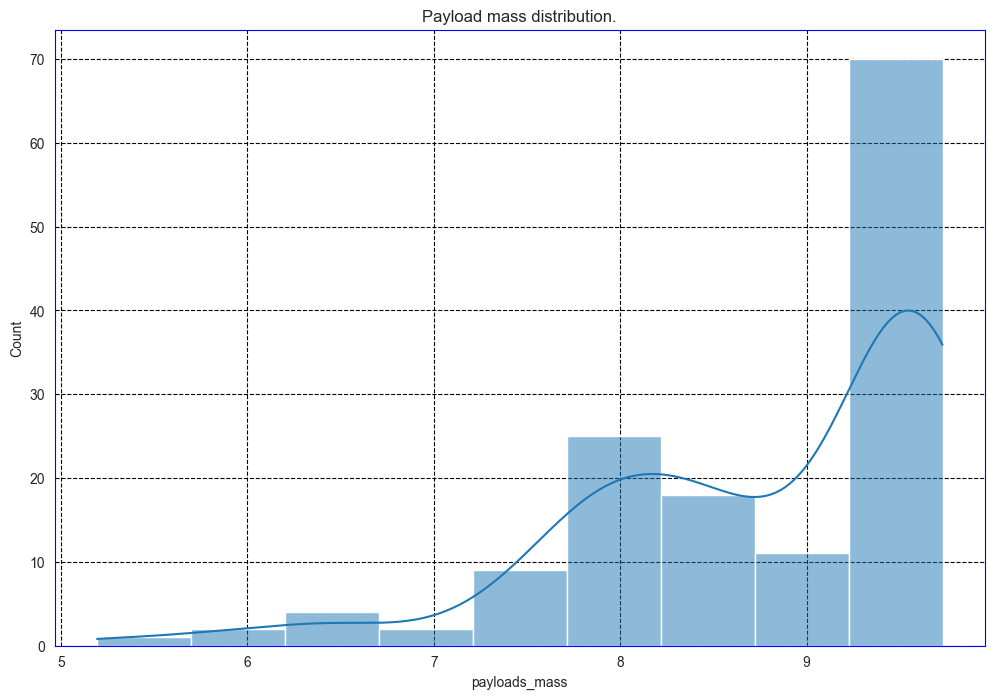

In [76]:
sns.histplot(np.log(raw_df['payloads_mass']), kde=True)
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [77]:
mass_range = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [78]:
lower_interval = np.min(np.floor(raw_df['payloads_mass'])).astype(np.int64)
upper_interval = np.max(np.ceil(raw_df['payloads_mass'])).astype(np.int64)
lower_interval, upper_interval

(180, 16795)

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [79]:
interval_size = 2*(raw_df['payloads_mass'].quantile(0.75) - raw_df['payloads_mass'].quantile(0.25))*(len(raw_df['payloads_mass'])**(-1/3))
total_bins = np.ceil(mass_range/interval_size).astype(np.int64)
interval_size, total_bins

(4354.236068716339, 4)

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [80]:
label_for_bins = ['bin_no_1', 'bin_no_2', 'bin_no_3', 'bin_no_4']

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [81]:
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=total_bins, labels=label_for_bins, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

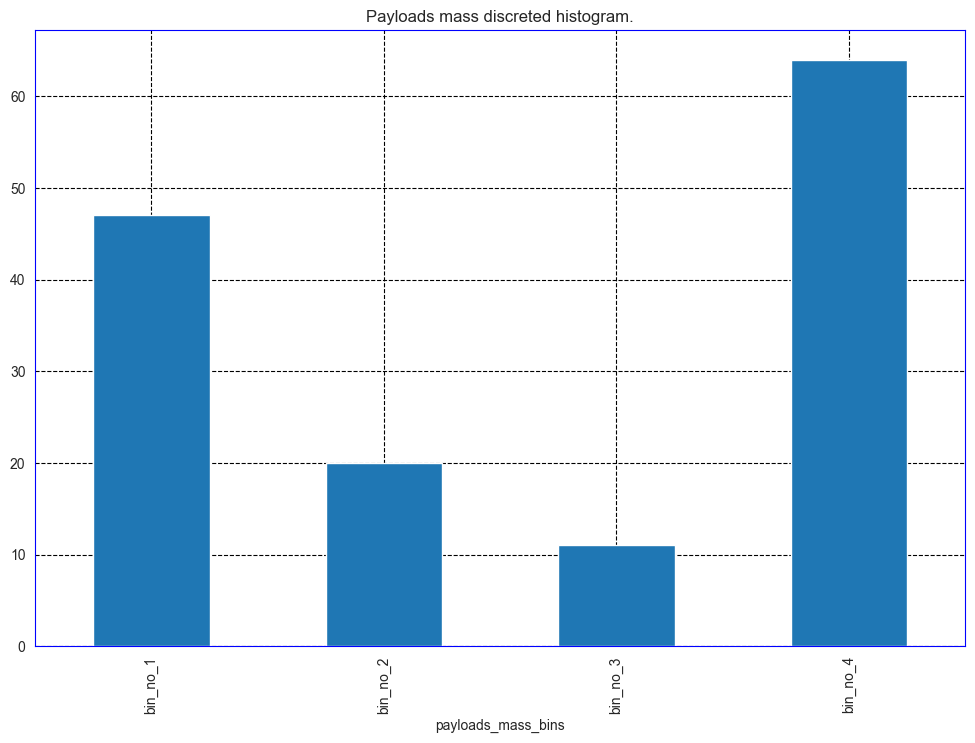

In [82]:
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

- It can be observed that the **Equal Width Discretization** technique has divided the data in the `payloads_mass` column into four different categories. This helps reduce the complexity of continuous data and transforms it into discrete data that is easier to manage.
- However, the values in the `payloads_mass` column are not evenly distributed, leading to an imbalance in the number of values across the bins.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [83]:
_, bins = pd.qcut(raw_df['payloads_mass'], q=4, labels=False, retbins=True, precision=3)

- Step 02: Create bin labels

In [84]:
label_for_bins = ['bin_no_1', 'bin_no_2', 'bin_no_3', 'bin_no_4']

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [85]:
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=bins, labels=label_for_bins, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

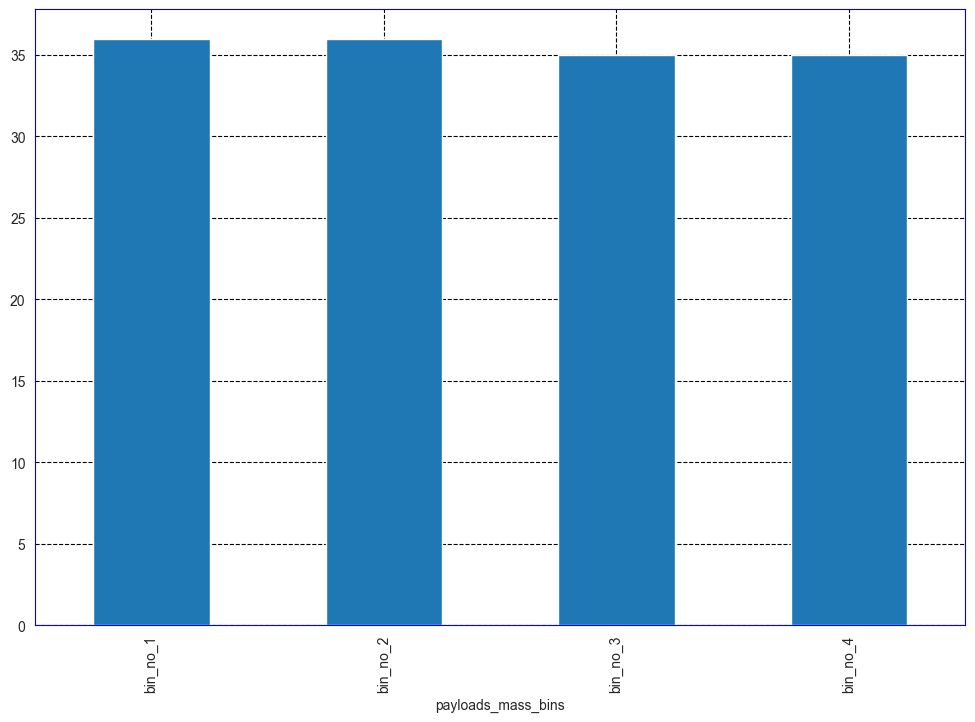

In [86]:
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

- **K-Means Discretization**: is a discretization technique that applies the K-Means clustering algorithm to transform continuous data into discrete categories. Specifically, this method partitions the dataset into clusters based on predefined centroids. Each data point is then assigned a label corresponding to the cluster it belongs to.
- **Advantages**:
    - Does not require prior knowledge of the data distribution.
    - Can be applied to asymmetric or non-normally distributed data.
- **Disadvantages**:
    - Requires choosing an appropriate number of clusters (K).
    - Sensitive to noise in the data.

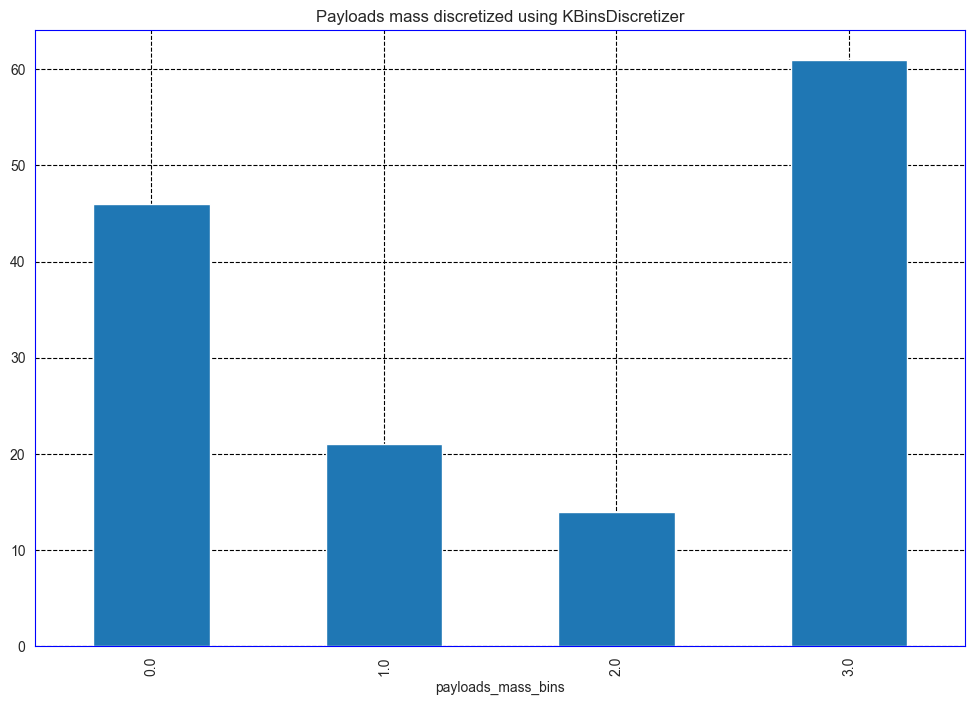

In [87]:
kbd = KBinsDiscretizer(n_bins=total_bins, encode='ordinal', strategy='kmeans')
raw_df['payloads_mass_bins'] = kbd.fit_transform(raw_df[['payloads_mass']])

raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discretized using KBinsDiscretizer")
plt.show()

- **Decision Tree Discretization** is a discretization technique that utilizes decision trees to convert continuous data into discrete intervals. This method partitions the data into discrete ranges based on threshold values of the continuous variable, with each range corresponding to a leaf node in the decision tree.
- **Advantages**:
    - Handles noisy data effectively.
- **Disadvantages**:
    - Requires handling missing values in the dataset before applying the method.

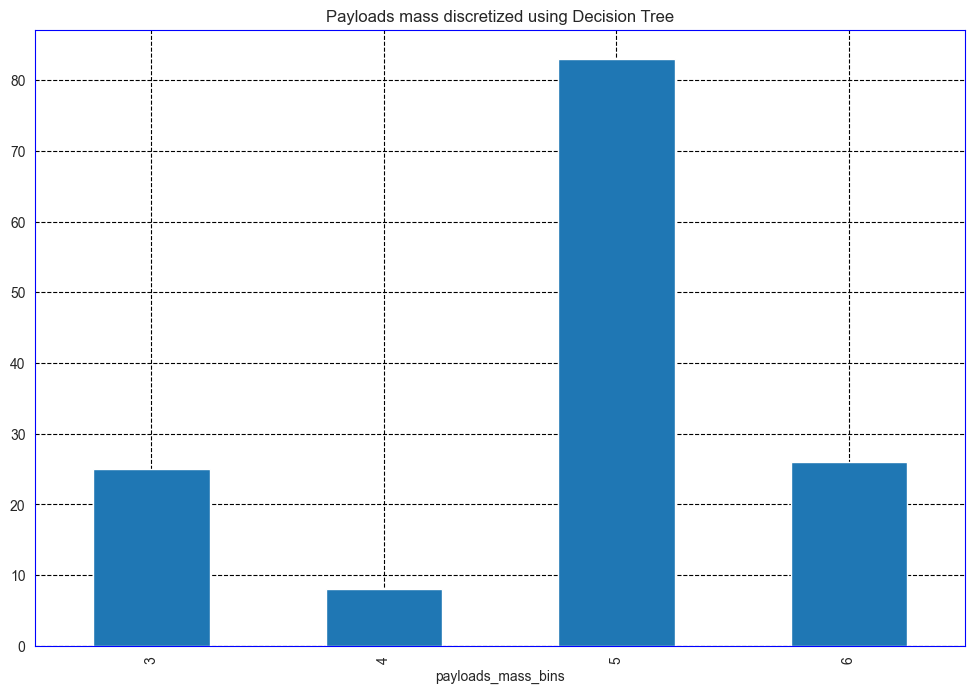

In [88]:
dt = DecisionTreeClassifier(max_leaf_nodes=total_bins)  # Số lượng lá tối đa là 4
dt.fit(raw_df[['payloads_mass']], raw_df['payloads_mass'])
raw_df['payloads_mass_bins'] = dt.apply(raw_df[['payloads_mass']])

raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discretized using Decision Tree")
plt.show()

In [89]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

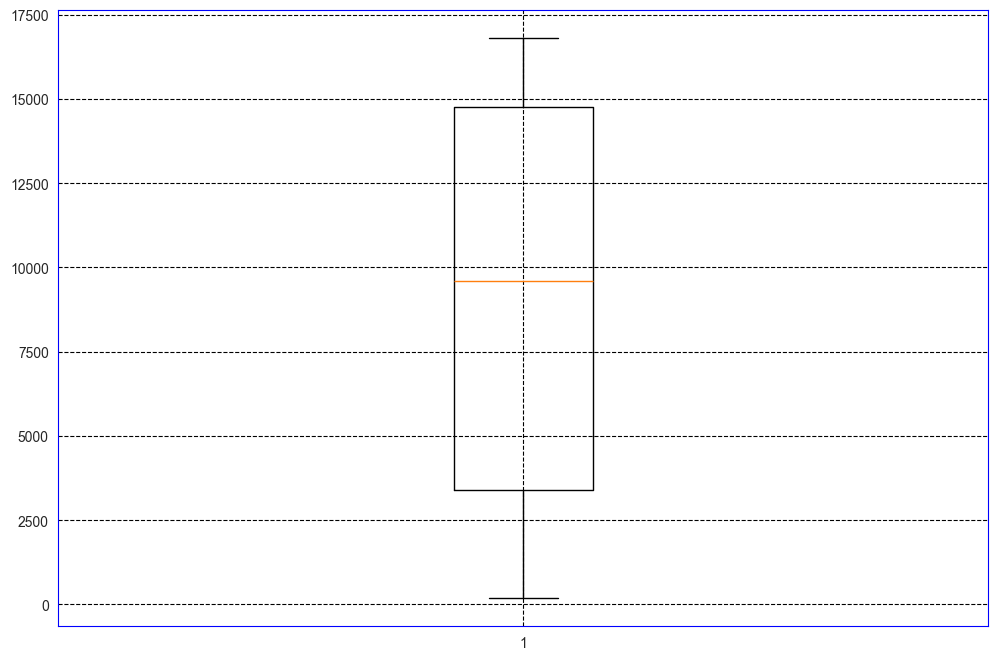

In [90]:
# YOUR CODE HERE
plt.boxplot(raw_df['payloads_mass'])
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [91]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [92]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [93]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

- **Advantages**:
    - Simple, easy to implement, and provides quick results.
- **Disadvantages**:
    - May lead to the loss of important information, especially if outliers are valid and meaningful in certain contexts.
    - Can distort the distribution of the data.
    - Requires selecting an appropriate threshold.

### Outlier Capping Using IQR

What is the IQR distance normally used to cap outliers via IQR?

- The Interquartile Range (IQR) is commonly used to identify outliers. The threshold for detecting outliers is defined as: `1.5*IQR`

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [94]:
mean = raw_df['payloads_mass'].mean()
sigma = raw_df['payloads_mass'].std()
upper_bound = mean + 3*sigma
lower_bound = mean - 3*sigma

- Step 02: Construct rule for trimming outliers.

In [95]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [96]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]
raw_df.shape, payloadsmass_outliers.shape, rawdf_without_payloadsmass_outliers.shape

((142, 185), (142,), (142, 185))

What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

- **Advantages**:
    - Easy to implement and provides quick results.
    - The coefficient before the standard deviation can be adjusted to set the threshold.
- **Disadvantages**:
    - May result in the loss of important information.
    - Mean and standard deviation are sensitive to outliers.
    - When data does not follow a normal distribution, the standard deviation may not accurately represent the central tendency and distribution, leading to incorrect outlier detection.
- **Common Threshold for Outlier Detection**: $mean \pm 3*std$

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [97]:
upper_bound = raw_df['payloads_mass'].quantile(0.9) 
lower_bound = raw_df['payloads_mass'].quantile(0.1)

- Step 02: Construct rule for trimming outliers.

In [98]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [99]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]
raw_df.shape, payloadsmass_outliers.shape, rawdf_without_payloadsmass_outliers.shape

((142, 185), (142,), (120, 185))

What are the advantages and disadvantages of using Quantiles?

- **Advantages**:
    - Less affected by extreme values in the data.
    - Does not require the data to follow a normal distribution.
    - Flexible in setting thresholds for identifying outliers.
- **Disadvantages**:
    - May lead to the loss of important information.

## Feature scaling techniques

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [100]:
scaler = StandardScaler()

- Step 02: Fitting

In [101]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [102]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [103]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transp

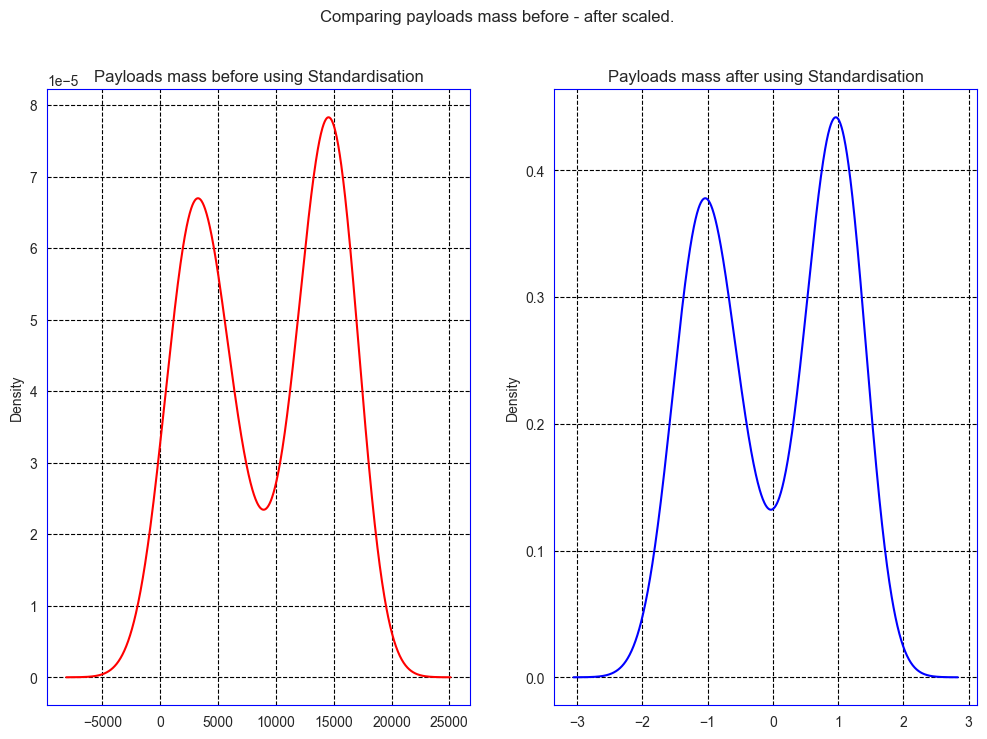

In [104]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

- It can be observed that there are two peaks concentrated around the values -1 and 1.
- The density appears to be more stable, fluctuating between 0 and 0.5.
- After applying **normalization**, the distribution of `payloads_mass` becomes more stable and more concentrated.

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

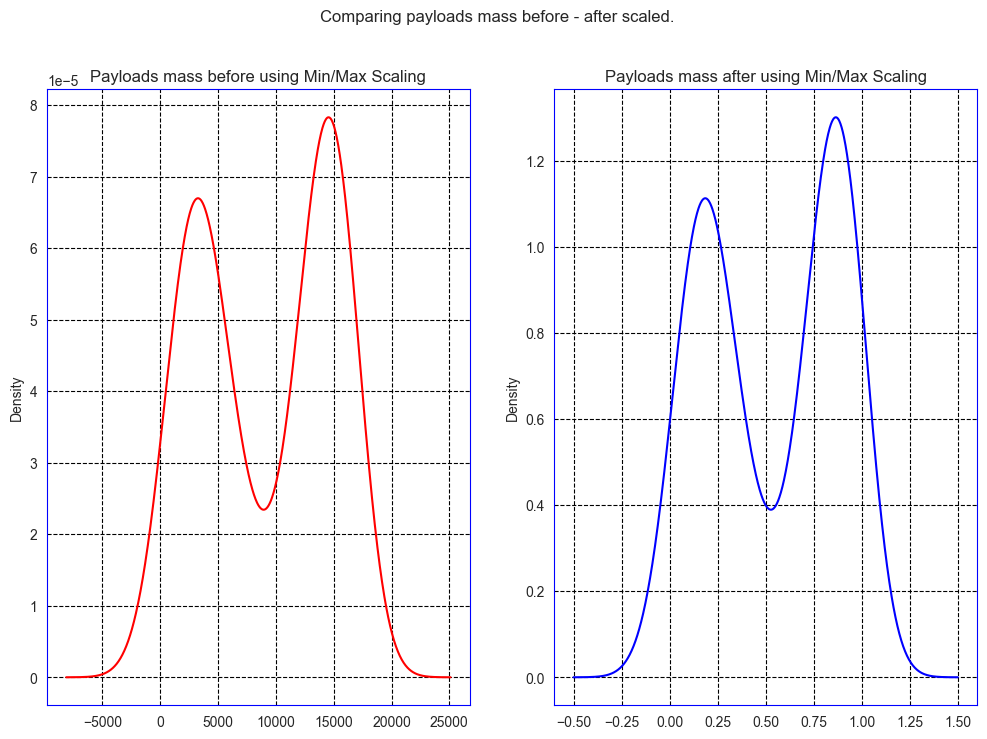

In [105]:
scaler = MinMaxScaler()
scaler.fit(raw_df[['payloads_mass']])
raw_df_scaled = scaler.transform(raw_df[['payloads_mass']])
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns= ['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Min/Max Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Min/Max Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

- After applying **Min/Max Scaling**, the values range between 0 and 1.
- The density also becomes more stable.
- This technique preserves the original shape of the data distribution.
- After using **Min/Max Scaling**, the distribution of `payloads_mass` becomes more stable and more concentrated.

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**Difference Between Mean Normalization and Min/Max Scaling**

- Mean Normalization
    - Each value in the dataset is **subtracted by the mean** of the dataset and then **divided by the range** (the difference between the maximum and minimum values).  
$
X' = \frac{X - \text{mean}(X)}{\max(X) - \min(X)}
$
    - Centers the data around **zero**, meaning that after normalization, values will have a mean of **0**.
    - Useful for algorithms that assume **zero-centered data**, such as gradient-based optimization methods.

- Min/Max Scaling
    - Each value in the dataset is **subtracted by the minimum value** and then **divided by the range** (the difference between the maximum and minimum values).  
$
X' = \frac{X - \min(X)}{\max(X) - \min(X)}
$
    - Scales all values to be within **[0,1]**, preserving the shape of the distribution.
    - Useful when working with models that require **input values within a specific range** (e.g., neural networks).

- Observations
    - **Mean Normalization** centers the data around **0**, while **Min/Max Scaling** transforms the data into a **fixed range**.
    - **Mean Normalization** is beneficial for **gradient-based optimization**, while **Min/Max Scaling** is better suited for algorithms requiring **bounded input values**.


TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

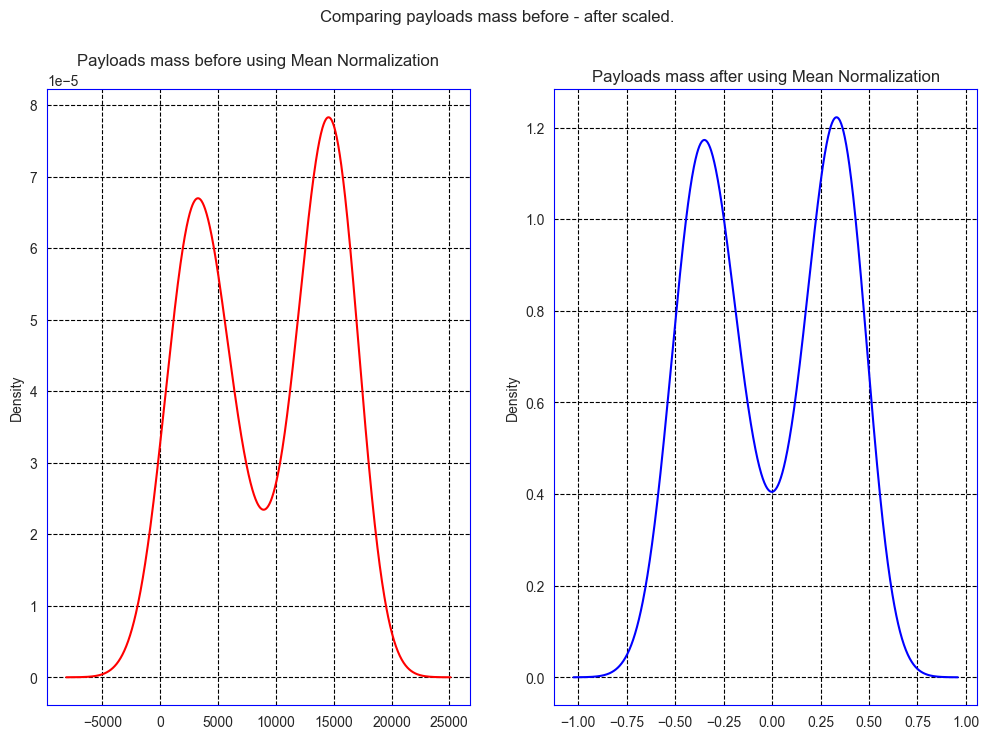

In [106]:
raw_df_scaled["payloads_mass"] = (raw_df["payloads_mass"] - raw_df["payloads_mass"].mean()) / (raw_df["payloads_mass"].max() - raw_df["payloads_mass"].min())

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Mean Normalization")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Mean Normalization")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

- After applying **Mean Normalization**, the distribution of `payloads_mass` becomes more stable and concentrated.
- The shape of the data distribution changes compared to the original dataset.

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

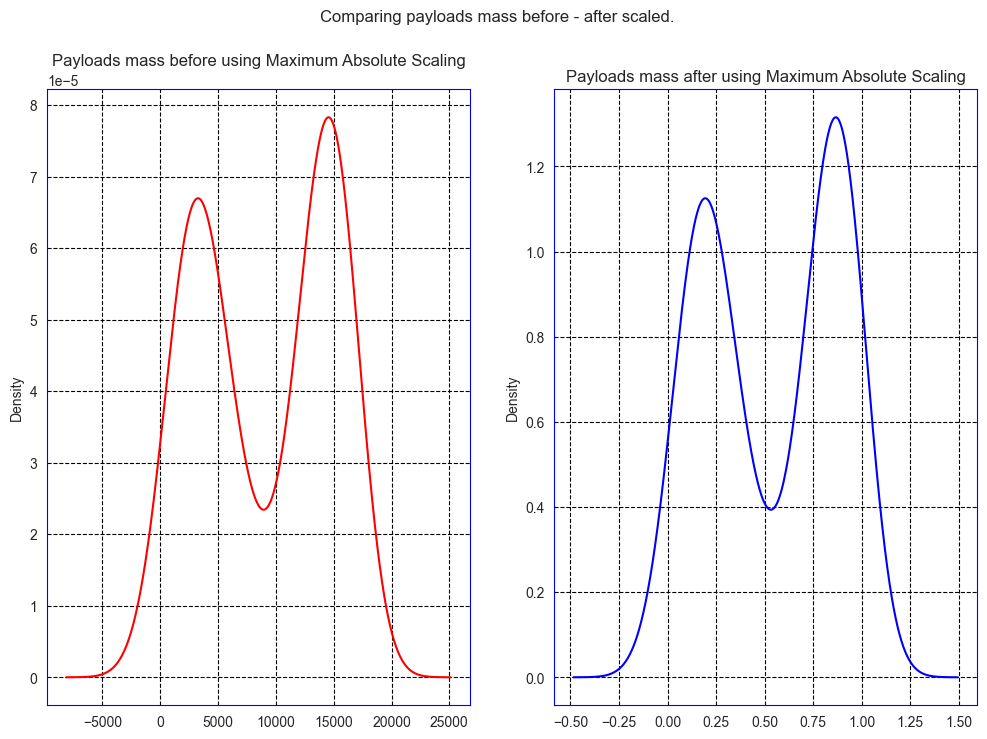

In [107]:
scaler = MaxAbsScaler()
scaler.fit(raw_df[['payloads_mass']])
raw_df_scaled = scaler.transform(raw_df[['payloads_mass']])
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns= ['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Maximum Absolute Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Maximum Absolute Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

- The density of the data becomes more stable.
- The technique preserves the original shape of the data distribution.
- After applying **Maximum Absolute Scaling**, the distribution of `payloads_mass` becomes more stable and concentrated.

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

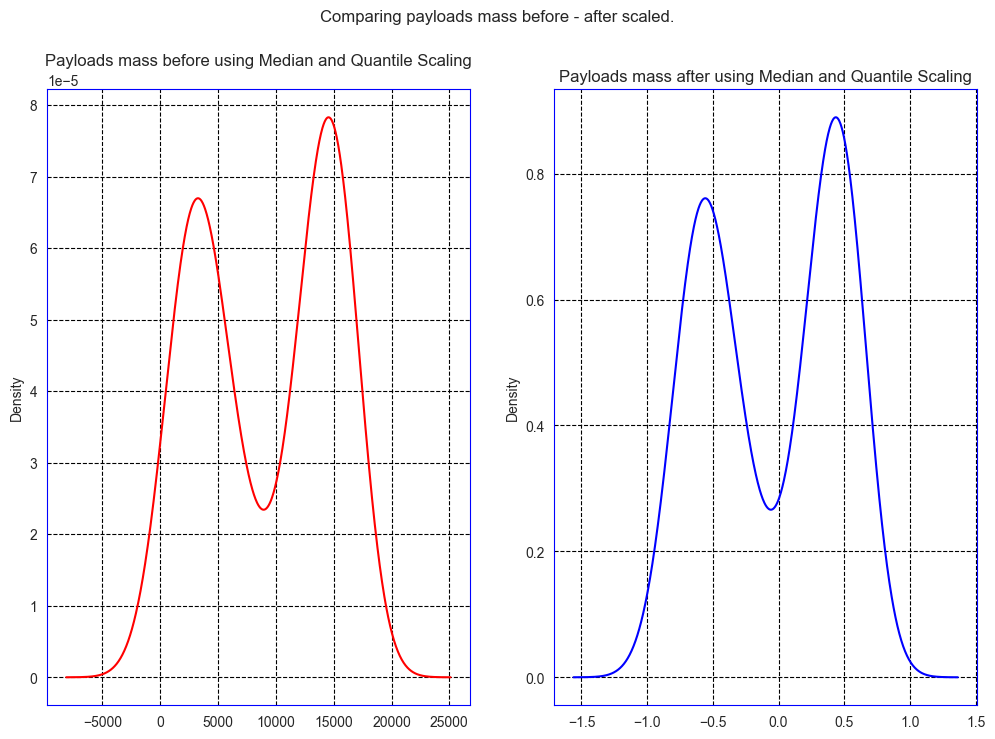

In [108]:
scaler = RobustScaler()
scaler.fit(raw_df[['payloads_mass']])
raw_df_scaled = scaler.transform(raw_df[['payloads_mass']])
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns= ['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Median and Quantile Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Median and Quantile Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

- The density of the data becomes more stable.
- The technique preserves the original shape of the data distribution.
- After applying **Median and Quantile Scaling**, the distribution of `payloads_mass` becomes more stable and concentrated.

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

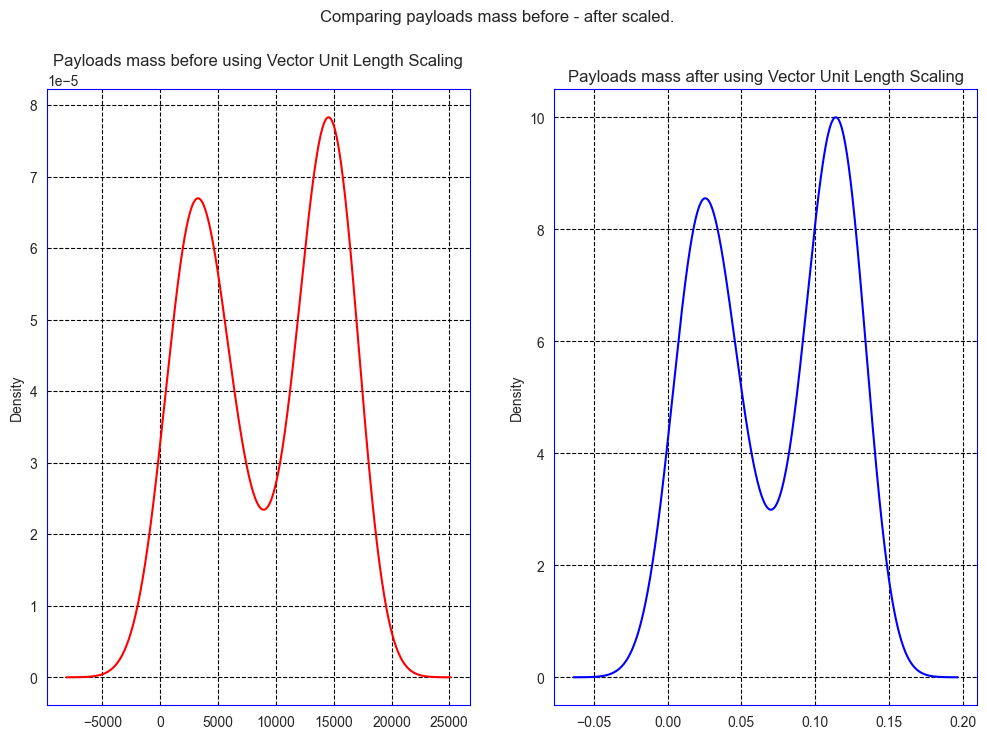

In [109]:
scaler = Normalizer()
scaler.fit(raw_df['payloads_mass'].values.reshape((1,-1)))
raw_df_scaled = scaler.transform(raw_df['payloads_mass'].values.reshape(1,-1)).T
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns= ['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Vector Unit Length Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Vector Unit Length Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

- The density of the data becomes more stable.
- The technique preserves the original shape of the data distribution.
- After applying **Median and Quantile Scaling**, the distribution of `payloads_mass` becomes more stable and concentrated.

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

- **Standardization:**
    - Used when you want to transform data into a normal distribution.
- **Min/Max Scaling:**
    - When you want to preserve the original distribution of the data.
    - When the variables do not follow a normal distribution.
    - Not suitable for data with outliers.
- **Mean Normalization:**
    - When the variables in the dataset approximate a normal distribution.
    - Not suitable for data with outliers.
- **Maximum Absolute Scaling:**
    - When you want to retain the original distribution of the data and avoid losing distribution information.
    - When variables have a non-symmetric distribution.
    - Not suitable for data with outliers.
- **Median and Quantile Scaling:**
    - When you want to reduce the impact of outliers.
- **Vector Unit Length Scaling:**
    - When you want to ensure that the magnitude of vectors does not affect model performance.